<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/058%20-%20Lesson%2058%20(Simple%20Linear%20Regression%20-%20Equation%20of%20a%20Straight%20Line).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 58: Simple Linear Regression - Equation of Straight Line

### Teacher-Student Activities

In this class, we will learn the concept called linear regression, which is one of the essential topics of machine learning. Using linear regression we can do predictions. However, in technical terms, these predictions are always our best estimates. There will always be some margin of error in the predictions.


Let's understand linear regression with the help of an example. In the previous classes, we were analysing the air quality in one of the cities of Italy. Using the same dataset, in this class, we will predict the relative humidity based on the temperature.

**Why is relative humidity important for us to know?**

The human body is very sensitive to humidity as the skin relies on air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. When the air is at 100% relative humidity level, sweat does not evaporate. Consequently, you feel much hotter than the actual temperature. When the relative humidity is low, you feel much cooler than the actual temperature because the sweat evaporates easily, this gives the sensation of cooling off.

For example, according to the Heat Index (link: https://en.wikipedia.org/wiki/Heat_index), a relative humidity of 75% at air temperature of 80.0 °F (26.7 °C) would feel like 83.6 °F ±1.3 °F (28.7 °C ±0.7 °C).

Let's quickly run the codes covered in the previous classes and begin this session from **Activity 1: Slope and Intercept**

---

### Recap

In [ ]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median()
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Group the DataFrames about the 'Month' column.
group_2004_month = aq_2004_df.groupby(by='Month')
group_2005_month = aq_2005_df.groupby(by='Month')

# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([aq_2004_df, aq_2005_df])

# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
 10  Year           9357 non-null   int64         
 11  Month          9357 non-null   int64         
 12  Day            9357 non-null   int64         
 13  Day Name       9357 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 1.1+

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_2$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

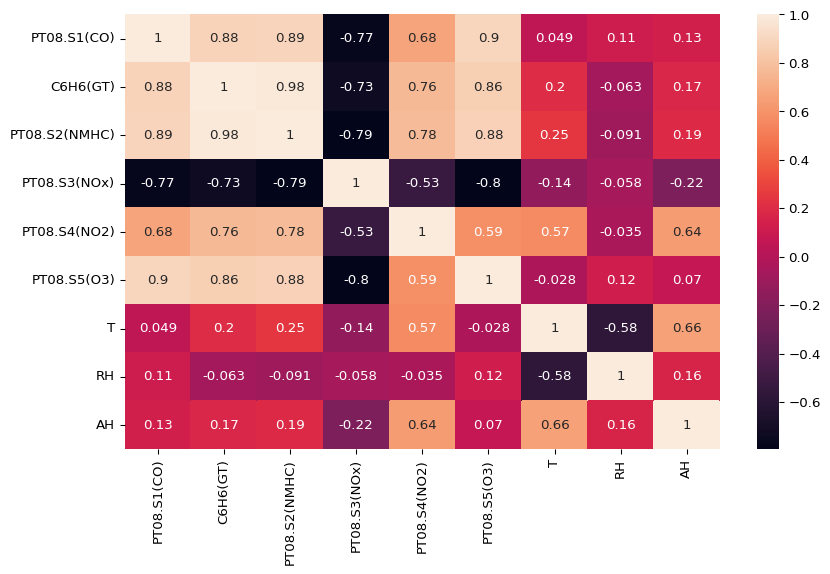

In [ ]:
# Heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation.
corr_df = df.iloc[:, 1:-4].corr()
plt.figure(figsize = (10, 6), dpi = 96)
sns.heatmap(data = corr_df, annot = True) # 'annot=True' fills the R values in the heatmap cells.
plt.show()

---

#### Activity 1: Slope & Intercept^

Before we learn linear regression, we need to know the equation of a straight line. We have already learned the slope of a line.

It is given as *the tangent of the angle made by a straight line with $x$-axis in the anti-clockwise (or counter-clockwise) direction*.

Consider the straight line shown below. Let its equation be

$$y = mx + c$$

where

- $y$ is the $y$-coordinate of the point lying on the line

- $x$ is the $x$-coordinate of the point lying on the line

- $m$ is the slope of the line

- $c$ is the intercept made by the line on the $y$-axis

**Note:** The above form of the equation of a straight line is called **slope-intercept** form. There are other forms as well. But for the sake of learning linear regression, we will stick to the **slope-intercept** form only.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/eq-st-line1.png' width = 700></center>

Here, the straight line intersects with $x$-axis at point $A$ and makes an angle $\theta$ in the anti-clockwise direction as indicated by the arrowhead of the curved red line.

So $$\angle BAP = \theta$$

Let $B(5, 2)$ and $C(7, 4)$ be any two arbitrary points on the line.

Since $RD \parallel OQ$ and the straight line $y = mx + c$ is the transversal line, therefore $\angle CBD = \angle BAP$ because they are corresponding angles.

Hence, in the right-angled triangle $CBD$, $\angle CBD = \theta$, $CD$ is the perpendicular and $DB$ is the base.

$$\therefore m = \tan \theta = \frac{CD}{DB} = \frac{2}{2} = 1$$

So, the slope of the straight line $y = mx + c$ is $m = \tan \theta = 1$.

Therefore, the equation of the line is $$y = x + c$$

Now $c$ is an unknown quantity, i.e., the $y$-coordinate of point $E$. To find $c$, substitute either $(5, 2)$ or $(7, 4)$ in the equation of line because these two points lie on the line.

So,

$$2 = 5 + c \Rightarrow c = -3$$

Therefore, the equation of the line is $$y = x - 3$$

Also, the coordinates of the point $E$ are $(0, -3)$.

**Zero Slope**

Notice that the equations for the straight lines:

- $RD$ can be written as $y = 2$ with slope $m = \tan 0^{\circ} = 0$

- $SC$ can be written as $y = 4$ with slope $m = \tan 0^{\circ} = 0$

as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/eq-st-line2.png' width = 700></center>


**Undefined (Not Defined) Slope**

Similarly, the equations for the straight lines:

- $BP$ can be written as $x = 5$ with slope $m = \tan 90^{\circ} = \text{undefined}$

- $CQ$ can be written as $x = 7$ with slope $m = \tan 90^{\circ} = \text{undefined}$

as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/eq-st-line3.png' width = 700></center>


Let's look at the fourth case where the slope of a straight line is **negative** because the angle created by the line with $x$-axis is obtuse, i.e., $\theta > 90^{\circ}$ as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/eq-st-line4.png' width = 700></center>

Let the equation of line be $$y = mx + c$$

Let $B(5, 3)$ and $C(1, 6)$ be any two arbitrary points on the line.

Here
$$\angle BAQ = 180^{\circ} - \theta$$

$$\Rightarrow \angle CBD = \angle BAQ \left[\because \text{corresponding angles}\right]$$

So in $\triangle CBD$,
$$m = \tan (180^{\circ} - \theta) = \frac{CD}{DB}$$

$$\Rightarrow m = - \tan \theta = \frac{3}{4}$$

So, the equation of the straight is

$$y = - \frac{3}{4}x + c$$

To find $c$, substitute either $(1, 6)$ or $(5, 3)$ in the equation of line because these two points lie on the line.

So,

$$6 = - \frac{3}{4} \times 1 + c \Rightarrow c = \frac{27}{4}$$

Therefore, the equation of the line is

$$y = - \frac{3}{4}x + \frac{27}{4}$$

Also, the coordinates of the point $E$ are $\left(0, \frac{27}{4}\right)$.


---

In [ ]:
df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day',
       'Day Name'],
      dtype='object')

#### Activity 2: Best Fit Line^^

In simple linear regression, we consider only one **independent variable** to predict the value of the **dependent variable**. In this case, we want to create a simple linear regression model that predicts the **relative humidity** (dependent variable) in a city for a certain **temperature** (independent variable) recorded.

If you look at the scatter plot between relative humidity and temperature, you can see that the points seem to follow a linear pattern.

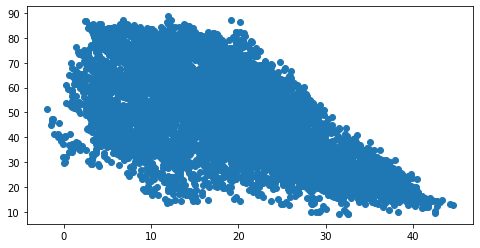

In [ ]:
# S2.1: Create a scatter plot for the temperature and relative humidity columns.
plt.figure(figsize = (8,4))
plt.scatter(df['T'], df['RH'])
plt.show()

In linear regression, we try to create a straight line which fits most of these points. You can create a regression plot to understand how a line fits most of these points.

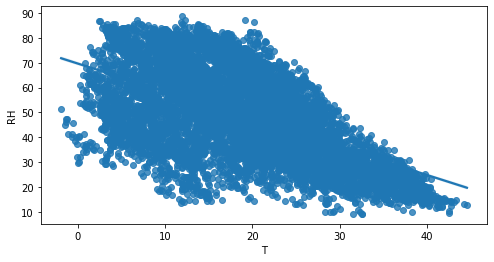

In [ ]:
# S2.2: Create a regression plot for the temperature and relative humidity columns.
plt.figure(figsize = (8,4))
sns.regplot(df['T'], df['RH'])
plt.show()

As you can see in the regression plot, a straight line having a negative slope passes through these points and tries to fit most of them.

In simple linear regression, our job is to find this straight line which is called the **best fit line**.

Let's try to simulate a few possible lines that can pass through these points in an attempt to fit them.

Let the equation of the best fit line be $$y = mx + c$$

Here,
- $y$ represents the relative humidity values on the $y$-axis

- $x$ represents the temperatures values on the $x$-axis

- $m$ is the slope of the line

- $c$ is the intercept made by the line on the $y$-axis

The above equation can also be written as
$$\text{relative humidity} = m \times \text{temperature} + c$$



---

#### Activity 3: The `ipywidgets` Module^^^

Let's create an interactive Python widget to simulate a few possible lines passing through the points in the scatter plot between relative humidity and temperature.

To create this widget, first, you have to import the `interactive` class from the `ipywidgets` module.



In [ ]:
# S3.1: Import the 'interactive' class from the 'ipywidgets' module and open its documentation.
from ipywidgets import interactive


**Note:** The double question marks (`??`) opens the official documentation for any object or a function.

In the documentation, you can see that the `interactive` class inherits the `VBox` class.


Next, we will create a function which draws a scatter plot and a line plot in one figure only. Let's name this function as `simulate_straight_lines()`. It will take two inputs; slope of a straight line and its intercept. In the function:

  - Create a NumPy array of numbers (say `x_coordinates`) to plot them on the $x$-axis.
  
  - Plot the straight line between the array of numbers (`x_coordinates`) and `slope * x_coordinates + intercept` array where the `slope` and `intercept` are the inputs of the function whose value we will keep on changing.
  
  - Create a scatter plot between the relative humidity and temperature values.

Next, in the constructor of the `interactive` class, we will pass three inputs:

- The `simulate_straight_lines()` function that needs to be executed in the widget

- `slope` i.e. the first input of the `simulate_straight_lines()` function

- `intercept` i.e. the second input of the `simulate_straight_lines()` function

In [ ]:
# S3.2: Create an interactive Python widget to simulate a few possible lines passing through the points in the scatter plot between 'RH' & 'T.
def simulate_straight_lines(slope, intercept):
  plt.figure(figsize = (8,4))
  x_coordinate = np.arange(df['T'].min() - 10, df['T'].max() + 10)
  plt.scatter(df['T'], df['RH'])
  plt.plot(x_coordinate, slope * x_coordinate + intercept)
  plt.show()

In [ ]:
interact = interactive(simulate_straight_lines, slope = (-2,0,0.1), intercept = (-100,100,2))

In [ ]:
interact

interactive(children=(FloatSlider(value=-1.0, description='slope', max=0.0, min=-2.0), IntSlider(value=0, desc…


In the above widget, you can play around with the slope and intercept values by moving their corresponding sliders. If you

- increase the **slope** of the line, it will rotate in the anti-clockwise direction
- decrease the **slope** of the line, it will rotate in the clockwise direction
- increase the **intercept** of the line, it will shift in the upward direction
- decrease the **intercept** of the line, it will shift in the downward direction


Let's stop here. In the next class, we will continue from here.

---